In [1]:
import math
import matplotlib.pyplot as plt

from library.basic_functions import truncate_to_decimal_places

# Q1:

**Solve exp(−x) − x = 0 using fixed-point method, accurate up to 4 places in decimal.**

$$
e^{-x} -x = 0
$$

Solving the given equation is equivalent to solving this equation:
$$
x = e^{-x}
$$

according to the fixed point method, let our function $\phi(x)$ be:

$$
\phi(x) = e^{-x}
$$

**Note:** The used `Eqn.fixed_point_iteration` function can be found in the [equation.jl](../library/equation.jl) file.

In [2]:
from library.nonlinear_equations import fixed_point_iteration

def phi(x):
    return math.exp(-x)

ans = fixed_point_iteration(phi, 1)
print(f"Fixed point iteration: {truncate_to_decimal_places(ans, 4)}")

Fixed point iteration: 0.5671


# Q2

Use Simpson’s rule and appropriate Gaussian quadrature to evaluate the following integral accurate up to 6 places in decimal

$$
\int_0^1 \sqrt{1+x^4} dx
$$

In [3]:
from library.integration import simpson_rule, gaussian_quadrature

def f(x):
    return math.sqrt(1 + x**4)

simp = simpson_rule(f, 0, 1, 4)
print(f"Simpson's rule: {truncate_to_decimal_places(simp, 6)}")

gquad = gaussian_quadrature(f, 0, 1, n=5)
print(f"Gaussian quadrature: {truncate_to_decimal_places(gquad, 6)}")

Simpson's rule: 1.089429
Gaussian quadrature: 1.089428


# Q3
Solve the following ODE with RK4 with interval sizes 0.5, 0.2, 0.05 and 0.01

$$
\frac{dy}{dx} = \frac{5x^2 - y}{e^{x+y}}
$$

where $y(0) = 1$

Tabulate the results.

h = 0.01 -> 1.071577
h = 0.05 -> 1.071577
h = 0.2 -> 1.071585
h = 0.5 -> 1.071926


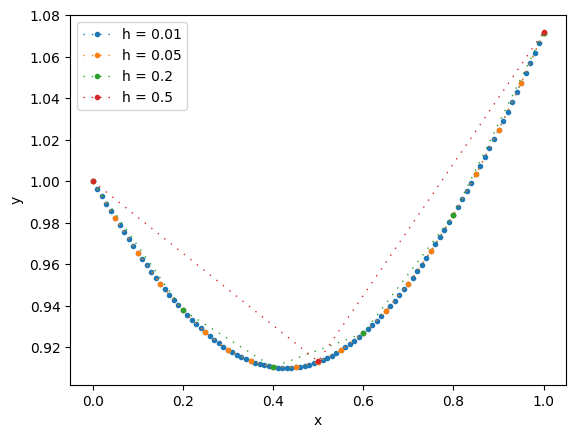

In [4]:
from library.diffeq import rk4

def f(x, y):
    return (5*x**2 - y) / math.exp(x + y)

upto_x = 1

xs, ys, y0 = rk4(f, upto_x, x0=0, y0=1, h = 0.01)
plt.plot(xs, ys, label="h = 0.01", linewidth=1, linestyle=(0, (1, 5)), marker=".")
print(f"h = 0.01 -> {truncate_to_decimal_places(y0, 6)}")

xs, ys, y0 = rk4(f, upto_x, x0=0, y0=1, h = 0.05)
plt.plot(xs, ys, label="h = 0.05", linewidth=1, linestyle=(0, (1, 5)), marker=".")
print(f"h = 0.05 -> {truncate_to_decimal_places(y0, 6)}")

xs, ys, y0 = rk4(f, upto_x, x0=0, y0=1, h = 0.2)
plt.plot(xs, ys, label="h = 0.2", linewidth=1, linestyle=(0, (1, 5)), marker=".")
print(f"h = 0.2 -> {truncate_to_decimal_places(y0, 6)}")

xs, ys, y0 = rk4(f, upto_x, x0=0, y0=1, h = 0.5)
plt.plot(xs, ys, label="h = 0.5", linewidth=1, linestyle=(0, (1, 5)), marker=".")
print(f"h = 0.5 -> {truncate_to_decimal_places(y0, 6)}")


plt.xlabel("x")
plt.ylabel("y")
plt.legend()

**Note:** I didn't understand what is meant by "Tabulate the results", so I just plotted the graph. Incase a $x_{final}$ had been mentioned, we could have printed the value of $y_{final}=f(x_{final})$ for each interval size. But since it wasn't mentioned, I included the graph of the function with the table of the $x_{final}$ which I used.

|   interval sizes   | $x_{final} = 1$ |
|:------------------:|:-----------:|
|       0.5          |  1.071926   |
|       0.2          |  1.071585   |
|       0.05         |  1.071577   |
|       0.01         |  1.071577   |

- the lines are in dotted lines because we are not sure about those points

# Q4

Solve the heat equation $u_t= 4u_xx$, using Crank-Nicolson and your choice of $\alpha$, subjected to the boundary conditions:

$$u(0,t) = 0$$
$$u(8,t) = 0$$
$$u(x,0) = 4x −x^2/2$$

Since matrix inversion is not taught in class, you may use ready-made available routines for the purpose. Comment on your choice of $\alpha$ and inversion algorithm. Display the solution both in a table and a contour plot.

In [5]:
from library.diffeq import crank_nicolson_heat_eqn
import numpy as np  # used linspace

In [18]:
L = 8
T = 1
Nl = 500
Nt = 500
alpha_scale = 2

x = np.linspace(0, 8, Nl + 1)
time = np.linspace(0, T, Nt + 1)
u0 = 4*x - x**2/2

u, alpha = crank_nicolson_heat_eqn(u0, L, T, Nl, Nt, alpha_scale)
print(f"Chosen {alpha = }")

Chosen alpha = 15.625000000000002


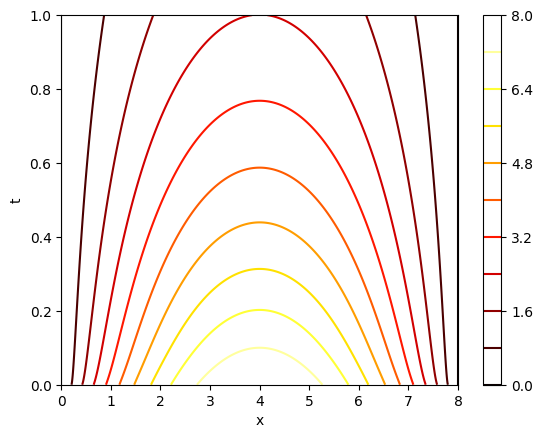

In [26]:
plt.contour(*np.meshgrid(x, time), u.T, 10, cmap="hot")
plt.xlabel('x')
plt.ylabel('t')
plt.colorbar()

**Choice of $\alpha$:** Cranck-Nicolson method is unconditionally stable, so we can choose any value of $\alpha$.

**Solution in a Table:**

In [69]:
p = lambda x: truncate_to_decimal_places(x, 4)
print(f"|  x   | t={time[0]:.2f} | t={time[100]:.2f} | t={time[200]:.2f} |  ...  |  t={time[-1]} |")
print( "|------|--------|--------|--------|-------|--------|")
for i in range(0, Nl+1, 20):
    print(f"| {x[i]:.2f} | {p(u[i,0]):.4f} | {p(u[i,100]):.4f} | {p(u[i,200]):.4f} |  ...  | {p(u[i,-1]):.4f} |")

|  x   | t=0.00 | t=0.20 | t=0.40 |  ...  |  t=1.0 |
|------|--------|--------|--------|-------|--------|
| 0.00 | 0.0000 | 0.0000 | 0.0000 |  ...  | 0.0000 |
| 0.32 | 1.2288 | 0.8208 | 0.6330 |  ...  | 0.3013 |
| 0.64 | 2.3552 | 1.6271 | 1.2559 |  ...  | 0.5979 |
| 0.96 | 3.3792 | 2.4049 | 1.8587 |  ...  | 0.8851 |
| 1.28 | 4.3008 | 3.1410 | 2.4318 |  ...  | 1.1583 |
| 1.60 | 5.1200 | 3.8234 | 2.9661 |  ...  | 1.4132 |
| 1.92 | 5.8368 | 4.4415 | 3.4532 |  ...  | 1.6459 |
| 2.24 | 6.4512 | 4.9865 | 3.8855 |  ...  | 1.8526 |
| 2.56 | 6.9632 | 5.4508 | 4.2563 |  ...  | 2.0300 |
| 2.88 | 7.3728 | 5.8287 | 4.5599 |  ...  | 2.1755 |
| 3.20 | 7.6800 | 6.1158 | 4.7917 |  ...  | 2.2866 |
| 3.52 | 7.8848 | 6.3088 | 4.9481 |  ...  | 2.3617 |
| 3.84 | 7.9872 | 6.4058 | 5.0270 |  ...  | 2.3996 |
| 4.16 | 7.9872 | 6.4058 | 5.0270 |  ...  | 2.3996 |
| 4.48 | 7.8848 | 6.3088 | 4.9481 |  ...  | 2.3617 |
| 4.80 | 7.6800 | 6.1158 | 4.7917 |  ...  | 2.2866 |
| 5.12 | 7.3728 | 5.8287 | 4.5599 |  ...  | 2.

# Q5

Solve the Poisson’s equation $u_{xx}+u_{yy}= xe^y$ in a $6^2$ grid with boundary conditions

- $u(0,y) = 0$
- $u(2,y) = 2e^y$
- $u(x,0) = x$
- $u(x,1) = xe$

Display the solution both in a table and a 3-D plot.